#### importing liberaries


In [10]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mat
plt.style.use("seaborn-v0_8-dark-palette")
import itertools
from collections import Counter


#### reading and merging dfs

In [11]:
def reading_and_merging(names:list,axis=0)-> pd.DataFrame:
    dfs=[]
    for i in names:
        dfs.append(pd.read_csv(i))
    
    return pd.concat(dfs,axis=axis)

In [12]:
df=reading_and_merging(os.listdir())

#### exploring and cleaning the DFs

In [13]:
temp_index=df.loc[df["Order ID"]=="Order ID"].index

In [14]:
df.drop(index=temp_index,inplace=True)

In [15]:
del temp_index

In [16]:
df.isna().sum()

Order ID            536
Product             536
Quantity Ordered    536
Price Each          536
Order Date          536
Purchase Address    536
dtype: int64

In [17]:
df.dropna(inplace=True)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 182735 entries, 0 to 11685
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          182735 non-null  object
 1   Product           182735 non-null  object
 2   Quantity Ordered  182735 non-null  object
 3   Price Each        182735 non-null  object
 4   Order Date        182735 non-null  object
 5   Purchase Address  182735 non-null  object
dtypes: object(6)
memory usage: 9.8+ MB


In [19]:
df["Price Each"]=df["Price Each"].astype("float")
df["Quantity Ordered"]=df["Quantity Ordered"].astype("int")

In [20]:
df["Order Date"]=pd.to_datetime(df["Order Date"])



C:\Users\W.D1998\AppData\Local\Temp\ipykernel_3024\972268025.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df["Order Date"]=pd.to_datetime(df["Order Date"])


#### Question 1: What was the best month for sales? How much was earned that month? 

In [21]:
df["Month"]=df["Order Date"].dt.month_name()

In [22]:
sales_per_month=df.groupby(["Month"])[["Price Each"]].sum().reset_index()
sales_per_month.sort_values(by=["Month"],inplace=True)
sales_per_month

,Month,Price Each
0,April,3313522.35
1,August,2178183.81
2,December,4533151.68
3,February,2145208.87
4,January,1776155.79
5,July,2572764.75
6,June,2508863.49
7,March,2740393.12
8,May,3084756.09
9,November,3130968.77


In [23]:

def setting_month_catagory(df:pd.DataFrame,column)->pd.DataFrame:
    months_list = ["January", "February", "March", "April", "May", "June","July", "August", "September", "October", "November", "December"]
    df[column]=pd.Categorical(df[column],months_list,ordered=True)
    return df

sales_per_month=setting_month_catagory(df=sales_per_month,column="Month")
sales_per_month.sort_values("Month",inplace=True)
sales_per_month

,Month,Price Each
4,January,1776155.79
3,February,2145208.87
7,March,2740393.12
0,April,3313522.35
8,May,3084756.09
6,June,2508863.49
5,July,2572764.75
1,August,2178183.81
11,September,2038019.59
10,October,3658884.86


In [24]:
sales_per_month.loc[sales_per_month["Price Each"]==sales_per_month["Price Each"].max()]

,Month,Price Each
2,December,4533151.68


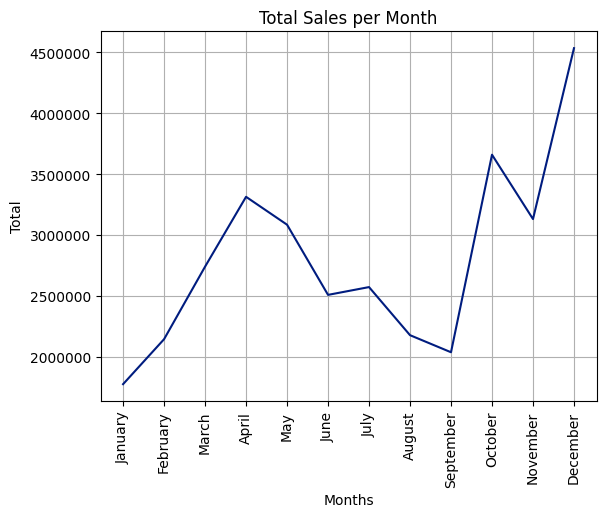

In [25]:
sns.lineplot(data=sales_per_month,x="Month",y="Price Each")
plt.xticks(rotation="vertical")
plt.title("Total Sales per Month")
plt.xlabel("Months")
plt.ylabel("Total")
plt.yscale("linear")
plt.ticklabel_format(style="plain",axis="y")
plt.style.use("seaborn-v0_8-dark-palette")
plt.grid(visible=True)
plt.show()


#### Question 2: What city sold the most product?

In [26]:
df["City"]=df["Purchase Address"].str.split(",",expand=True)[1]
df["City"]=df["City"].str.strip()

In [27]:
city_quantity_price=df.groupby("City").sum(numeric_only=True)
city_quantity_price.reset_index(inplace=True)

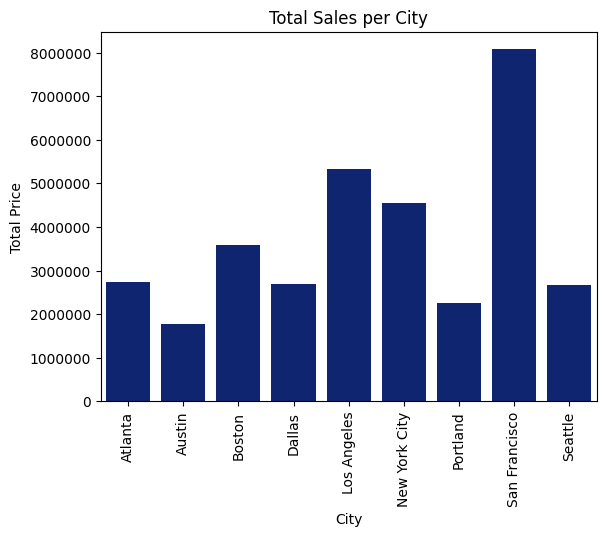

In [28]:
sns.barplot(data=city_quantity_price,x="City",y="Price Each")
plt.xticks(rotation="vertical")
plt.title("Total Sales per City")
plt.xlabel("City")
plt.ylabel("Total Price")
plt.yscale("linear")
plt.ticklabel_format(style="plain",axis="y")
plt.style.use("seaborn-v0_8-dark-palette")
plt.grid(visible=False)
plt.show()

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [29]:
df["Hour"]=df["Order Date"].dt.hour
hour_order_count=df.groupby("Hour")[["Order ID"]].count()

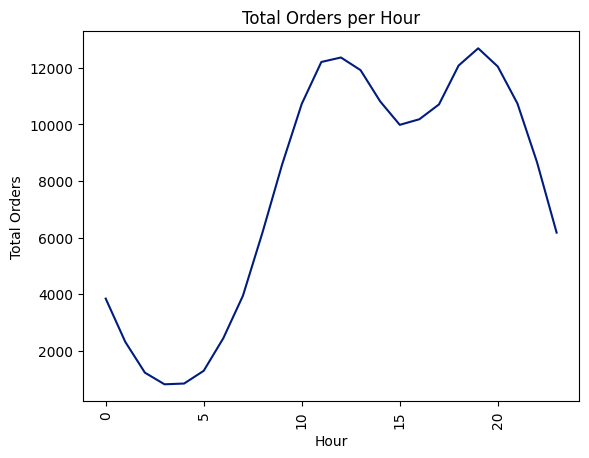

In [30]:
hour_order_count.reset_index(inplace=True)
sns.lineplot(data=hour_order_count,x="Hour",y="Order ID")
plt.xticks(rotation="vertical")
plt.title("Total Orders per Hour")
plt.xlabel("Hour")
plt.ylabel("Total Orders")
plt.yscale("linear")
plt.ticklabel_format(style="plain",axis="y")
plt.style.use("seaborn-v0_8-dark-palette")
plt.grid(visible=False)
plt.show()


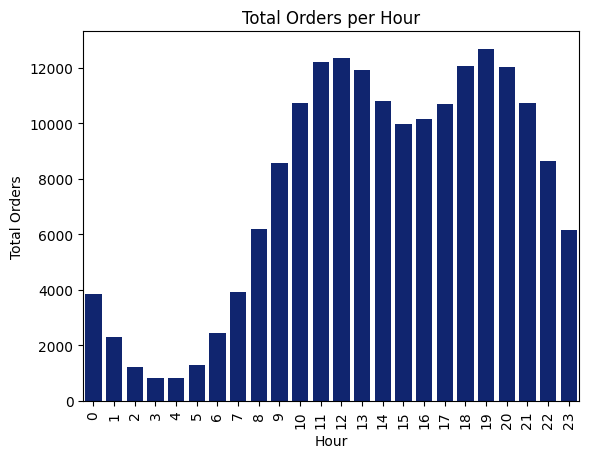

In [31]:
hour_order_count.reset_index(inplace=True)
sns.barplot(data=hour_order_count,x="Hour",y="Order ID")
plt.xticks(rotation="vertical")
plt.title("Total Orders per Hour")
plt.xlabel("Hour")
plt.ylabel("Total Orders")
plt.yscale("linear")
plt.ticklabel_format(style="plain",axis="y")
plt.style.use("seaborn-v0_8-dark-palette")
plt.grid(visible=False)
plt.show()

In [32]:
# the sales are starting to decline from the 23 to reach its lower count orders at 3 and 4 hour 
# ,so my reommendation for increasing the number of ads is at 0:7  

#### Question 4: What products are most often sold together?

In [33]:
df["Invoice_contents"]=df.groupby("Order ID")["Product"].transform(lambda x : ",".join(x))               
# used transform instead of apply to retunr a Series that has the same shape of the orginal Datfram
# therefor be able to assign the new series to the origal datafrme 
# and having each item with its whole Invoice contents 

df.head(6)



,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Hour,Invoice_contents
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",April,Dallas,8,USB-C Charging Cable
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",April,Boston,22,Bose SoundSport Headphones
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",April,Los Angeles,14,"Google Phone,Wired Headphones"
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",April,Los Angeles,9,Wired Headphones
6,176562,USB-C Charging Cable,1,11.95,2019-04-29 13:03:00,"381 Wilson St, San Francisco, CA 94016",April,San Francisco,13,USB-C Charging Cable


In [34]:
counter=Counter()
for i in df["Invoice_contents"]:
    row=i.split(",")
    x=itertools.combinations(row,r=2) # combination of 2 at least becasue the smallest number of items purchased together is 2 logically
    counter.update(x)                 # used Counter because it's easier thn dictionery 😂

In [35]:
for k,v in counter.most_common(10):
    print(k,v)

('iPhone', 'Lightning Charging Cable') 2066
('Google Phone', 'USB-C Charging Cable') 2042
('iPhone', 'Wired Headphones') 963
('Google Phone', 'Wired Headphones') 916
('iPhone', 'Apple Airpods Headphones') 760
('Vareebadd Phone', 'USB-C Charging Cable') 745
('Google Phone', 'Bose SoundSport Headphones') 500
('USB-C Charging Cable', 'Wired Headphones') 436
('Vareebadd Phone', 'Wired Headphones') 321
('Lightning Charging Cable', 'Wired Headphones') 250


In [36]:
# the most two items purchased togter according to this dataset is 
# iPhone & Lightning Charging Cable

#### What product sold the most? Why do you think it sold the most?

In [37]:
df["Total_price"]=df["Quantity Ordered"]*df["Price Each"]

In [38]:
pro_coun_tsales=df.groupby(["Product"])[["Order ID","Total_price"]].agg({
    "Order ID":"count",
    "Total_price":"sum"
})
pro_coun_tsales.rename(columns={"Order ID":"Count","Total_price":"Total_Sales"},inplace=True)
pro_coun_tsales.reset_index(inplace=True)

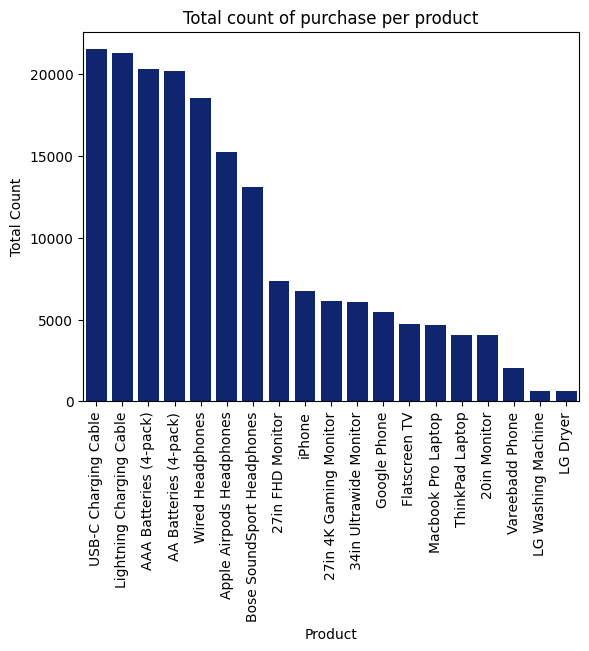

In [39]:
pro_coun_tsales.sort_values(by="Count",ascending=False,inplace=True)

sns.barplot(data=pro_coun_tsales,x="Product",y="Count")
plt.xticks(rotation="vertical")
plt.title("Total count of purchase per product")
plt.xlabel("Product")
plt.ylabel("Total Count")
plt.yscale("linear")
plt.ticklabel_format(style="plain",axis="y")
plt.style.use("seaborn-v0_8-dark-palette")
plt.grid(visible=False)
plt.show()

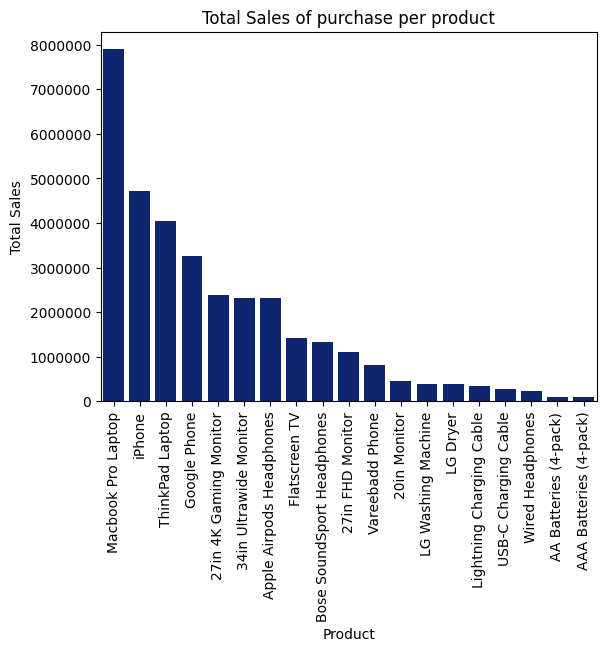

In [40]:
pro_coun_tsales.sort_values(by="Total_Sales",ascending=False,inplace=True)
sns.barplot(data=pro_coun_tsales,x="Product",y="Total_Sales")
plt.xticks(rotation="vertical")
plt.title("Total Sales of purchase per product")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.yscale("linear")
plt.ticklabel_format(style="plain",axis="y")
plt.style.use("seaborn-v0_8-dark-palette")
plt.grid(visible=False)
plt.show()

In [41]:
# the most sold one is USB-C Charging Cable but the product that tave the higest toal sales = Macbook Pro Laptop	